<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/ch04_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/SelfStudy/ds4th_study/source/밑바닥부터_시작하는_딥러닝

/content/drive/MyDrive/SelfStudy/ds4th_study/source/밑바닥부터_시작하는_딥러닝


# Chapter 4 신경망 학습
- 학습 - 훈련데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 이번장에서는 신경망이 학습을 할 수 있도록 해주는 지표인 손실함수에 대해 자세히 알아보자
    - 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

## 4.1 데이터에서 학습한다!
### 4.1.1 데이터주도학습
- 실제 신경망에서는 매개변수가 수만개~ 수억개가 있기에 수작업은 불가능
    - 알고리즘을 '설계'하는 대신 주어진 데이터를 잘 활용해서 해결하는 것이 필요
    - 예> 이미지에서 '특징'울 추출하고 그 특징의 패턴을 기계학습
> 그림 4-2 규칙을 '사람'이 만드는 방식에서 '기계'가 데이터로부터 배우는 방식으로의 파라다임의 전환<br>
회색블록은 사람이 개입하지 않음을 뜻함
<img src='https://drive.google.com/uc?id=1xTXBf7wwIZBDYQfO6dC34Q2wtXBb008o'>

### 4.1.2 훈련데이터, 실험데이터
-기계학습은 오버피팅을 방지하기 위해 훈련데이터, 테스트데이터를 구분한다.

## 4.2 손실함수
- 신경망 학습에서는 '현재의 상태를 하나의 지표'로 표현
- 손실함수 : 신경망 성능의 '나쁨'을 나타내는 지표. 최소화가 목표
    - 일반적으로 오차제곱합, 교차엔트로피 오차를 주로 사용

### 4.2.1 평균 제곱 오차
> - $E = \frac{1}{2} * \sum(y_k-t_k)^2$
    - yk : 신경망의 출력
    -  tk : 정답 레이블
    - k : 데이터의 차원 수

In [ ]:
import sys
print(sys.executable)

C:\Dev\Miniconda\python.exe


In [ ]:
# 평균제곱오차
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 정답레이블
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# ex1 '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

0.09750000000000003


In [ ]:
# ex2 '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

0.5975


첫번째 오차값이 더 잘 맞으므로 성능이 더 좋은 것으로 판단

### 4.2.2 교차 엔트로피 오차
실질적으로 정답일때의 추정의 자연로그를 계산하는 식이 됨
> - $ E = -\sum (t_k * log(y_k))$
    - log : 자연로그
    - yk : 신경망의 출력
    - tk : 정답 레이블(one-hot encoding)
    - k : 데이터의 차원 수
    
> 그림 4-3 자연로그 y=log$x$의 그래프
<img src='https://drive.google.com/uc?id=1xRUuWdcwqCjOliMlvTLquiaelb63PfXV'>
    

In [ ]:
# 크로스엔트로피
def cross_entropy_error(y, t):
    delta = 1e-7  # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))


# 동일한 계산
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 0.510825457099


0.510825457099338


In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 2.30258409299

2.302584092994546


## 4.2.3 미니배치학습
- 훈련 데이터 전체에 대한 오차함수

> - E = -1/N * ∑ _n (∑ _k (tk * log(yk)))
    - N : 데이터의 개수
    - 훈련 데이터 전체에 대한 손실 함수를 계산하기에는 시간이 오래걸리기 때문에
    - 일부를 추려 전체의 근사치로 이용할 수 있다.

In [ ]:
# 4.2.3 미니배치 학습
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

E:\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\miniconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\miniconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


(60000, 784)
(60000,)


In [ ]:
# 10사이즈 배치룰 임의 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)
print(x_batch)
print(t_batch)

[37617 51034    19  7513 28299 15873 29425 52320 31494  3958]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[8 7 9 7 3 5 2 0 1 8]


### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size


### 4.2.5 왜 손실 함수를 설정하는가?
- 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다.
- 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.
- (매개변수의 미소한 변화에는 거의 반응을 보이지 않고 그 값이 분연속적으로 변화)


## 4.3 수치미분

### 4.3.1 미분
- 미분은 한순간의 변화량을 나타냄<br>
<img src='https://drive.google.com/uc?id=1Z_Id9tQIped8tq8tV5vQ8wKVcDzxQm05'>

> - 좌변은 f(x)의 x에 대한 미분 (x에 대한 f(x)의 변화량
> - 시간h 를 한없이 0에 가깝게

In [ ]:
# 위의 수식을 굳이 구현하면 다음과 같다
import numpy as np
import matplotlib.pylab as plt

# 나쁜 구현 예
def numerical_diff_bad(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h
# h값이 너무 작아 반올림 오차를 일으킬 수 있음 10e-4정도가 적당하다고 알려짐
# 전방 차분에서는 차분이 0이 될 수 없어 오차가 발생
#  -> 오차를 줄이기 위해 중심 차분을 사용

- h값이 너무 작아 반올림 오차를 일으킬 수 있음 (10e-4정도가 적당하다고 알려짐)
    - 반올림오차 : 작은값(예> 소수점8자리 이하)가 생략되어 최종 계산결과에 오류 생기는것

In [ ]:
# 반올림오차 사례 : 32비트 부동소수점에 50자리수를 넣으면 0으로 출력
np.float32(1e-50)

0.0

> 그림 4-5 진정한 미분(진정한 접선)과 수치미분(근사로 구한 접선)의 값은 다르다<br>
<img src = 'https://drive.google.com/uc?id=1xFULCRKjXflQJH2Oe2iCYw1W3RlsT6iA'>
<br> 위와 같이 수치미분에는 오차가 포함됨. 오차를 줄이기 위해 (x+h), (x-h) 일 때의 함수f의 차분을 계산하는 방법을 쓰기도 함. 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심차분, 중앙차분이라 함

In [ ]:
# 두 개선점을 적용하여 수치미분을 구현
def numerical_diff(f, x):
    h = 10e-4
    return (f(x + h) - f(x - h)) / (2 * h)

###  4.3.2 수치 미분의 예
- 아주 작은 차분으로 미분하는 것을 수치미분이라 함. (근사치로 계산하는 것)
    - 한편 수식을 전개하여 미분하는 것은 해석적 미분 으로 표현 (일반적 미분)
![](https://drive.google.com/uc?id=1ZXJQUieK9-UpmKRSm28r9eIVc5AIkWqS)
<br>다음의 2차함수를 파이썬으로 구현하면...

In [ ]:
# y = 0.01x² + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

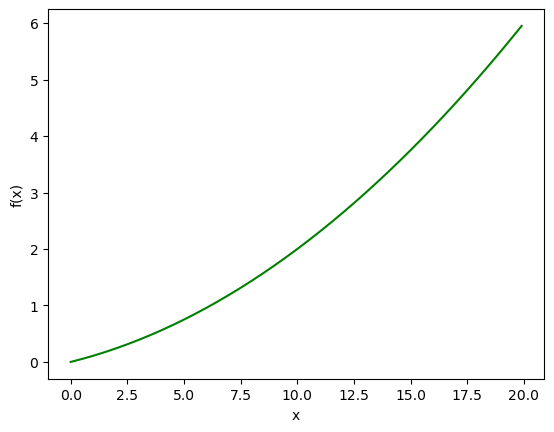

In [ ]:
x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, c='g' )
# plt.show()

0.200000000000089


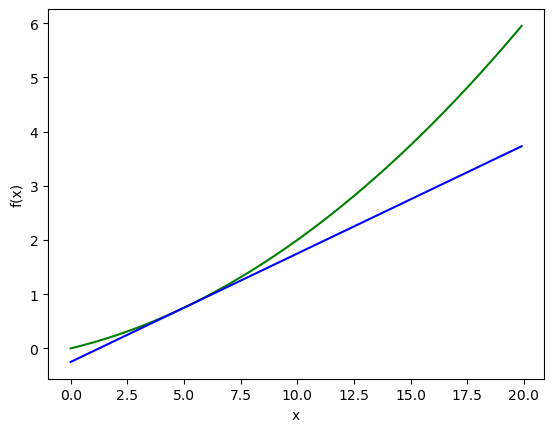

In [ ]:
# x_ = 5일때 미분
x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, c='g' )

x_=5
print(numerical_diff(function_1, x_))   # 0.200000000000089

# 접선의 함수를 구하는 함수
def tangent_line(f, x):
    d = numerical_diff(f, x)
    # print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, x_)
y2 = tf(x)
plt.plot(x, y2, c='b')
plt.show()

0.29999999999996696


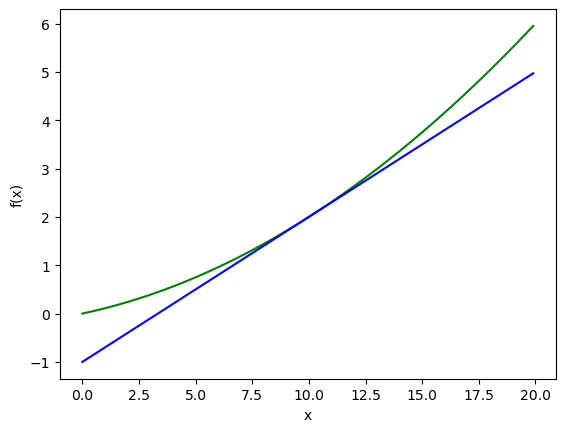

In [ ]:
# x_ = 10일때 미분
x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, c='g' )

x_= 10
print(numerical_diff(function_1, x_))   # 0.200000000000089

# 접선의 함수를 구하는 함수
def tangent_line(f, x):
    d = numerical_diff(f, x)
    # print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, x_)
y2 = tf(x)
plt.plot(x, y2, c='b')
plt.show()

###  4.3.3 편미분
- 인수의 제곱합을 계산하는 단순한 식이나, 변수가 2개
    - 어느 변수에 대한 미분을 하는지 구분 필요
    
![](https://drive.google.com/uc?id=1ZW1lG9LtTSq9h3_Wh5WfTNAlCv7Iqz3U)



In [ ]:
# 파이썬으로 구현하면...
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

> 그림 4-8 위 수식의 그래프 <br>
![](https://drive.google.com/uc?id=1x5g9Lg3DgTMxci9H9mK_aNH__MlxNSS_)

문제1 : $x_0$ = 3, $x_1$ = 4일 때, $x_0$에 대한 편미분을 구하라.

In [ ]:
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

numerical_diff(function_tmp1,3)

5.999999999998451

문제2 : $x_0$ = 3, $x_1$ = 4일 때, $x_1$에 대한 편미분을 구하라.

In [ ]:
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

8.000000000000895

## 4.4 기울기
- 편미분을 변수별 따로 계산 안하고 동시에 계산하려면?
    - 모든 변수의 편미분을 벡터로 정리한 것이 기울기(gradient)

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad


In [ ]:
# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)


print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]


[6. 8.]
[0. 4.]
[6. 0.]


### 4.4.1 경사법(경사 하강법)
![](https://drive.google.com/uc?id=1ZQxp7qPi_5XEOKtzVvcoNjpkrodUh9cj)
> -  η(eta) : 갱신하는 양, 학습률learning rate
> - f:최적화하려는 함수
> - init_x : 초깃값
> - lr : 학습률
>- step_num : 반복횟수

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]



[-6.11110793e-10  8.14814391e-10]


> 그림 4-10 경사법에 의한 갱신과정 : 점선은 함수의 등고선을 나타냄<br>
![](https://drive.google.com/uc?id=1vkghGC1duUQGZeM2EHXoZleDq8t2oav2)

In [ ]:
# 학습률이 너무 큼 lr=10.0
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함


[-2.58983747e+13 -1.29524862e+12]


In [ ]:
# 학습률이 너무 작음  lr=1e-10
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음

[-2.99999994  3.99999992]


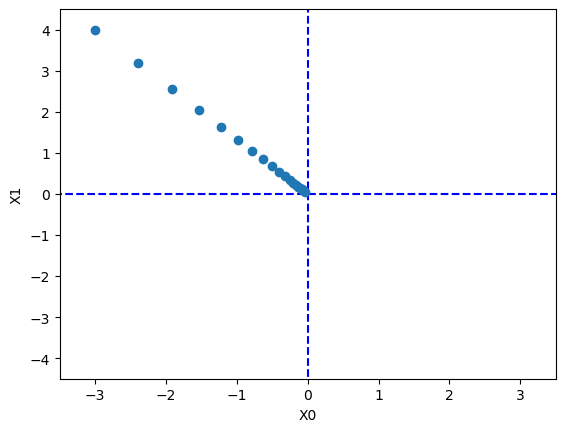

In [ ]:
# 그래프
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 신경망에서의 기울기
- 신경망에서의 기울기는 가중치 매개변수에 대한 손실함수의 기울기
    - 가중치가 W, 손실함수가 L인 신경망이 있는 경우, 경사는 다음 수식과 같음<br>
![](https://drive.google.com/uc?id=1ZPxNovSkSOF1oXOQecOH7C9LY2fU7Z4i)
> 기울기의 각 원소는 각각의 원소에 관한 편미분

1. 신경망 기울기 구하는 코드를 구현하면

In [ ]:
#
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    """docstring for simpleNet"""
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

2. 랜덤으로 가중치를 만들고

In [ ]:
net = simpleNet()
print(net.W)  # 가중치 매개변수(랜덤)

[[ 2.32045802 -1.53489989  0.35434014]
 [ 1.03681522 -0.38662639 -1.14193427]]


3. 데이터를 입력하여 예측하면

In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))  # 최댓값의 인덱스

[ 2.3254085  -1.26890369 -0.81513676]
0


4. 예측값과 정답레이블의 로스값 산출

In [ ]:
t = np.array([0, 0, 1])  # 정답 레이블
print(net.loss(x, t))

4.201455226067195


5. 위의 과정을 (net.W를 인수로 받아 손실함수 계산) 하는 f(W) 정의하여 numerical_gradient로 넘김

In [ ]:
# def f(W):
#     return net.loss(x, t)
f = lambda W : net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.56036076  0.01539848 -0.57575924]
 [ 0.84054114  0.02309772 -0.86363886]]


## 4.5 학습 알고리즘 구현하기

- 전제
    - 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
    - 신경망 학습은 다음과 같이 4단계로 수행한다.<br><br>

- 1단계 - 미니배치
    - 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,
    - 그 미니배치의 손실함수 값을 줄이는 것이 목표이다.

- 2단계 - 기울기 산출
    - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
    - 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

- 3단계 - 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

- 4단계 - 반복
    - 1~3단계를 반복한다.<br><br>

- 데이터를 무작위로 선정하기 때문에 확률적 경사 하강법stochastic gradient descent,SGD라고 부른다.


### 4.5.1 2층 신경망 클래스 구현하기

![](https://drive.google.com/uc?id=1OHDFn6VQX24vnBp1RF40e1CviTXUZ_fv)
![](https://drive.google.com/uc?id=1O-PlZalRkcsqz870WPZMD58-brsJ0oBq)

In [ ]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    """
    params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
    params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
    params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.

    grad : 기울기를 보관하는 딕셔너리 변수(numerical_gradient()의 반환값)
    grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기.
    grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기.
    """
    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [ ]:
if __name__ == '__main__':
    net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
    print(net.params['W1'].shape)  # (784, 100)
    print(net.params['b1'].shape)  # (100,)
    print(net.params['W2'].shape)  # (100, 10)
    print(net.params['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산
# 주의 : 실행하는데 아주 오래걸림
print(grads['W1'].shape)  # (784, 100)
print(grads['b1'].shape)  # (100,)
print(grads['W2'].shape)  # (100, 10)
print(grads['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배피 학습 구현하기
- 데이터 중 일부를 무작위 추출, 추출된 미니배치를 경사법으로 매개변수 갱신

In [ ]:
class TwoLayerNet:
    """
    params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
    params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
    params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.

    grad : 기울기를 보관하는 딕셔너리 변수(numerical_gradient()의 반환값)
    grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기.
    grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기.
    """
    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        # t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [ ]:
# * 주의 : 아주 오래 걸림 *
"""
60000개의 훈련 데이터에서 임의로 10000개의 데이터(이미지&정답 레이블)을 추려냄.
10000개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.
경사법에 의한 갱신 횟수를 10번으로 설정하고 갱신할 때마다 손실 함수를 계산한다.
"""
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

# 하이퍼 파라메터
iters_num = 10  # 반복횟수
train_size = x_train.shape[0]
batch_size = 10000  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):

    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradienetworkatch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        print(i)
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))

print(train_loss_list)

### 4.5.3 시험데이터로 평가하기
- 학습을 반복하며 손실함수의 값이 내려감.
    - 단 오버피팅 되지 않도록 정기적으로 훈현데이터와 시험데이터를 대상으로 정확도를 기록

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판

    # 매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch ==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "+str(train_acc)+", "+str(test_acc))

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7986333333333333, 0.8015
train acc, test acc | 0.8780333333333333, 0.8832
train acc, test acc | 0.8994333333333333, 0.9013
train acc, test acc | 0.90795, 0.9121
train acc, test acc | 0.9145166666666666, 0.9185
train acc, test acc | 0.9196, 0.9231
train acc, test acc | 0.9246166666666666, 0.9258
train acc, test acc | 0.9287, 0.9291
train acc, test acc | 0.9313833333333333, 0.9328
train acc, test acc | 0.9351666666666667, 0.9347
train acc, test acc | 0.93765, 0.9363
train acc, test acc | 0.9401166666666667, 0.9389
train acc, test acc | 0.94215, 0.9398
train acc, test acc | 0.9445166666666667, 0.9424
train acc, test acc | 0.9464666666666667, 0.9439
train acc, test acc | 0.9474333333333333, 0.945


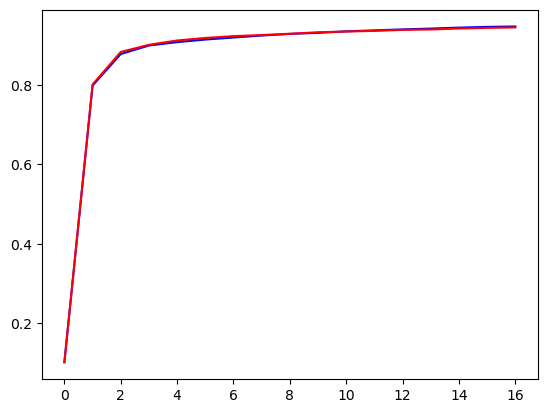

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_acc_list)),np.array(train_acc_list),c='b')
plt.plot(range(len(train_acc_list)),np.array(test_acc_list),c='r')
plt.show()

## 4장 정리
- 기계학습에서 사용하는 데이터셋은 훈련/시험 데이터로 나눠 사용한다,
- 훈련 데이터로 학습한 모델의 범용 능력을 사험 데이터로 평가한다,
- 신경망 학습은 손실함수를 지표로, 손실함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분 하는 것을 수치미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만 구현은 간단하다. 한편, 다음장에서 구현하는 오차역전파법은 기울기를 고속으로 구할 수 있다,